<a href="https://colab.research.google.com/github/MounikaAnnapureddy/IT-496/blob/main/MounikaA_DuPontAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd

myAPIKey = '7731aebd7b50af1b6637213667c8e584'

stock = 'AMZN'
balanceStatements = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{stock}?apikey={myAPIKey}').json()
incomeStatements = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{stock}?apikey={myAPIKey}').json()

In [ ]:
print (balanceStatements[:5])

[{'date': '2021-12-31', 'symbol': 'AMZN', 'reportedCurrency': 'USD', 'cik': '0001018724', 'fillingDate': '2022-02-04', 'acceptedDate': '2022-02-03 18:46:51', 'calendarYear': '2021', 'period': 'FY', 'cashAndCashEquivalents': 36220000000, 'shortTermInvestments': 59829000000, 'cashAndShortTermInvestments': 96049000000, 'netReceivables': 32891000000, 'inventory': 32640000000, 'otherCurrentAssets': 0.0, 'totalCurrentAssets': 161580000000, 'propertyPlantEquipmentNet': 216363000000, 'goodwill': 15371000000, 'intangibleAssets': 0.0, 'goodwillAndIntangibleAssets': 15371000000, 'longTermInvestments': 0.0, 'taxAssets': 0.0, 'otherNonCurrentAssets': 27235000000, 'totalNonCurrentAssets': 258969000000, 'otherAssets': 0.0, 'totalAssets': 420549000000, 'accountPayables': 78664000000, 'shortTermDebt': 0.0, 'taxPayables': 0.0, 'deferredRevenue': 11827000000, 'otherCurrentLiabilities': 51775000000, 'totalCurrentLiabilities': 142266000000, 'longTermDebt': 116395000000, 'deferredRevenueNonCurrent': 0.0, 'd

In [ ]:
#the numbers from the five most recent years
fiveYearBalanceStatement= balanceStatements[:5]
fiveYearIncomeStatement= incomeStatements[:5]

In [ ]:
#calculate profitability, assetTurnOver, and capitalStructure
#netincome/sales-first fraction
profitability=[]
#sales/assets-second fraction
assetTurnOver=[]
#assets/average shareholders equity-third fraction
capitalStructure=[]
#result of DuPont Analysis
returnOnEquity=[]
dates=[]
#getting details
for i in range (0,5):
  dates.append(fiveYearIncomeStatement[i]['date'])
  profitabilityValue=fiveYearIncomeStatement[i]['netIncome']/fiveYearIncomeStatement[i]['revenue']
  profitability.append(profitabilityValue)
  assetTurnOverValue=fiveYearIncomeStatement[i]['revenue']/fiveYearBalanceStatement[i]['totalAssets']
  assetTurnOver.append(assetTurnOverValue)
  capitalStructureValue=fiveYearBalanceStatement[i]['totalAssets']/fiveYearBalanceStatement[i]['totalStockholdersEquity']
  capitalStructure.append(capitalStructureValue)
  returnOnEquityValue=profitabilityValue*assetTurnOverValue*capitalStructureValue
  returnOnEquity.append(returnOnEquityValue)

In [ ]:
print(returnOnEquity)

[0.013940375285821585, 0.033435893279518465, 0.005955932382778902, 0.010047108131347536, 0.012831790837323324]


In [ ]:
print(profitability)

[0.07101412875514557, 0.05525249699531684, 0.04130870306072251, 0.04325273630559026, 0.01705216286417865]


In [ ]:
print(assetTurnOver)

[1.1171635172120253, 1.2019614253023865, 1.245391745986646, 1.431846687324775, 1.3545503008148656]


In [ ]:
print(capitalStructure)

[3.04205577055228, 3.4387713588283155, 3.6295198195294875, 3.734827435762015, 4.73889350030676]


In [ ]:
dp = pd.DataFrame(columns=['profitability','assetTurnOver','capitalStructure','returnOnEquity','date'])
dp['profitability']=profitability
dp['assetTurnOver']=assetTurnOver
dp['capitalStructure']=capitalStructure
dp['returnOnEquity']=returnOnEquity
dp['date']=dates
print(dp)

   profitability  assetTurnOver  capitalStructure  returnOnEquity        date
0       0.071014       1.117164          3.042056        0.241340  2021-12-31
1       0.055252       1.201961          3.438771        0.228374  2020-12-31
2       0.041309       1.245392          3.629520        0.186723  2019-12-31
3       0.043253       1.431847          3.734827        0.231303  2018-12-31
4       0.017052       1.354550          4.738894        0.109459  2017-12-31


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))
x=dp['date']  # a column in dp
#the following four are 4 different columns 
for yaxis in ['profitability', 'assetTurnOver', 'capitalStructure', 'returnOnEquity']:
  y=dp[yaxis]
  plt.plot(x,y)
  plt.show()

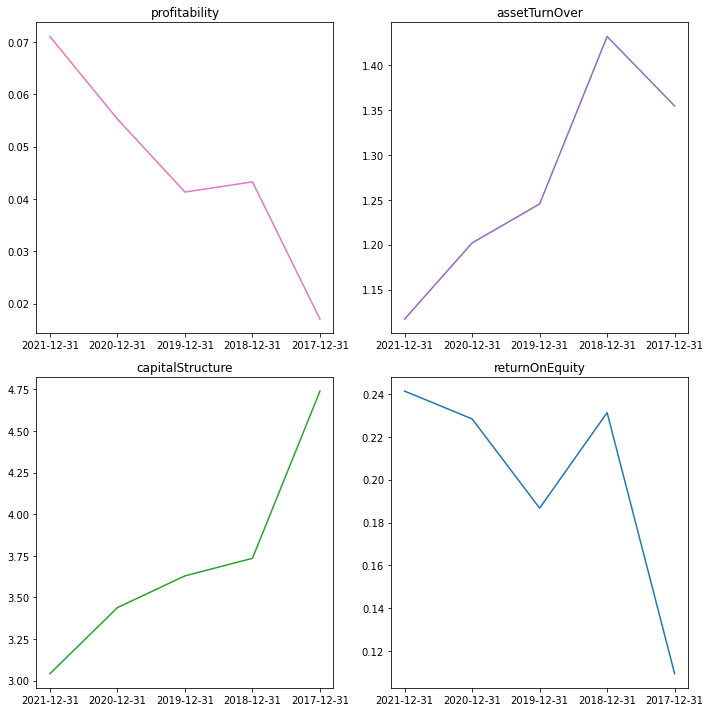

In [77]:
fig, axs=plt.subplots(2,2, figsize=(10,10))
x=dp['date']
axs[0,0].plot(x,dp['profitability'],'tab:pink')
axs[0,0].set_title('profitability')
axs[0,1].plot(x,dp['assetTurnOver'], 'tab:purple')
axs[0,1].set_title('assetTurnOver')
axs[1,0].plot(x,dp['capitalStructure'],'tab:green')
axs[1,0].set_title('capitalStructure')
axs[1,1].plot(x,dp['returnOnEquity'], 'tab:blue')
axs[1,1].set_title('returnOnEquity')
fig.tight_layout()

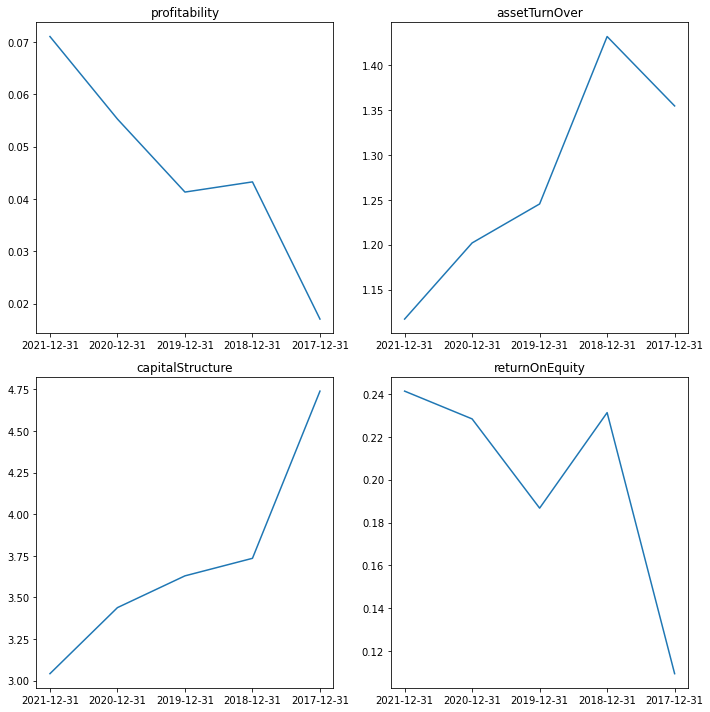

In [63]:
fig, axs=plt.subplots(2,2, figsize=(10,10))
x=dp['date']
values=['profitability', 'assetTurnOver', 'capitalStructure', 'returnOnEquity']
for i in range(0,2):
  for j in range(0,2):
    valueIndex=i*2+j
    axs[i,j].plot(x,dp[values[valueIndex]])
    axs[i,j].set_title(values[valueIndex])
fig.tight_layout()